####  Train BERTopic on a random sample of 300K of the corpus to predict topics on the whole corpus

In [4]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd
import pickle
import spacy
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textwrap import wrap
import plotly.io as pio
pio.renderers.default='iframe'

[nltk_data] Downloading package punkt to /home/msimon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
with open('clean_df.pkl', 'rb') as f:
    df = pickle.load(f)
#only keep the first 1000 characters of texts
df['texts'] = df['texts'].astype(str).apply(lambda x: x[0:1000] if len(x) > 1000 else x)

In [7]:
#check len of str again
#check len text once again
df['text_len'] = df['texts'].astype(str).apply(len)
df.sort_values(by = 'text_len', ascending = False)

,date,url,source,type,message_id,links,texts,text_len
1152663,2021-02-17 06:57:43+00:00,https://t.me/klokkenchat,klokkenchat,channel,115709.0,https://www.sin-nl.org/doofpot/doofpot-cardiol...,Aansluitende op het laatste bericht. \n\n \n\n...,1000
1618524,2021-05-23 16:10:22+00:00,https://t.me/nederlandsverzet21,nederlandsverzet21,channel,60017.0,NaN,Deze technologieën combineren water met geluid...,1000
1514779,2020-10-29 09:07:30+00:00,https://t.me/wakkerAmsterdam,wakkerAmsterdam,chat,7454.0,NaN,"Deze missie heet: ""Samen bevrijden we Apeldoor...",1000
798493,2020-06-25 05:11:43+00:00,https://t.me/samen1voornl,samen1voornl,chat,25491.0,https://www.transitieweb.nl/straling/lena-pu-h...,Goedemorgen. Nog héél even over 5G. Voor ieder...,1000
1918232,2021-05-23 16:11:49+00:00,https://t.me/BewustmakendNEWSNOW,BewustmakendNEWSNOW,chat,5908.0,NaN,These technologies combined water with sound f...,1000
...,...,...,...,...,...,...,...,...
958482,2021-06-02 12:08:26+00:00,https://t.me/klokkenchat,klokkenchat,chat,342393.0,NaN,👍,1
160212,2021-05-08 10:00:59+00:00,https://t.me/DeBataafseRepubliek,DeBataafseRepubliek,chat,346654.0,NaN,💪,1
870997,2020-02-08 18:32:01+00:00,https://t.me/Kletschat_burgers_tegen_onrecht,Kletschat_burgers_tegen_onrecht,chat,10347.0,NaN,👍,1
958493,2021-06-02 12:05:16+00:00,https://t.me/klokkenchat,klokkenchat,chat,342380.0,NaN,😂,1


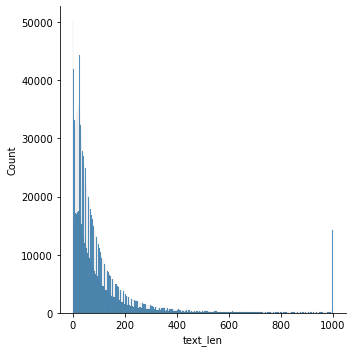

In [8]:
# Show the distribution of headline length 
sns.displot(df.text_len, kde=False)

In [12]:
## Get random sample of the dataset to train bertopic on 
sample = df.sample(
    n=300000, 
    frac=None, 
    replace=False, 
    weights=None, 
    random_state=2, 
    axis=None, 
    ignore_index=False
)

In [13]:
sample_docs = sample.astype(str).texts.to_list()

Adding *embedding_model=SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")* should include emojis in topics

In [14]:
topic_model = BERTopic(embedding_model=SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2"), language = 'multilingual', n_gram_range=(1, 2), min_topic_size=200, nr_topics="auto", diversity=0.3, verbose = True)
topics, probs = topic_model.fit_transform(sample_docs)

Batches:   0%|          | 0/9375 [00:00<?, ?it/s]

2022-05-17 17:58:19,814 - BERTopic - Transformed documents to Embeddings
2022-05-17 18:05:37,402 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-05-17 18:06:44,287 - BERTopic - Clustered reduced embeddings
2022-05-17 18:07:58,671 - BERTopic - Reduced number of topics from 199 to 131


In [114]:
#save model
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)
topic_model.save('model_300K')

In [9]:
#load model
topic_model = BERTopic.load("model_300K")

#### Predict topics on entire dataset using model_300K

In [16]:
docs = df.astype(str).texts.to_list()
timestamps = df.reset_index().date.to_list()

In [93]:
topics, probs = topic_model.transform(docs)

Batches:   0%|          | 0/55373 [00:00<?, ?it/s]

2022-05-18 06:34:59,409 - BERTopic - Reduced dimensionality
2022-05-18 06:48:52,454 - BERTopic - Predicted clusters


In [96]:
#loading the english language small model of spacy
#https://github.com/facebook/prophet/issues/418
#fix this
en = spacy.load('en_core_web_md')
nl = spacy.load('nl_core_news_sm')
sw_nl = nl.Defaults.stop_words
sw_en = en.Defaults.stop_words
#merge english and dutch stopwords
stopwords = sw_nl.union(sw_en)

In [97]:
# Update topic representation by increasing n-gram range and removing english stopwords
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 2),stop_words = stopwords, min_df = 10)
topic_model.update_topics(docs, topics, vectorizer_model=vectorizer_model)

In [99]:
#save topics
with open('topics.pkl', 'wb') as f:
    pickle.dump(topics, f)

In [110]:
#load topics
with open('topics.pkl', 'rb') as f:
    topics = pickle.load(f)

In [138]:
#info_df = topic_model.get_topic_info()
#all_topics = topic_model.get_topics()

In [10]:
topic_0 = topic_model.get_topic(0)
topic_0

[('wakkeren', 0.011751690185570856),
 ('wakkerenchat__ __', 0.0092244082299725),
 ('wakkerenchat__', 0.00922403022317552),
 ('wakker', 0.009041371878311683),
 ('perspectief wakkerenchat__', 0.008963126011007802),
 ('dank', 0.007824661019612355),
 ('morgen', 0.005598200183386352),
 ('perspectief wakkeren', 0.005287922779197536),
 ('wakkeren nl__', 0.005285973794843962),
 ('wakkeren chat__', 0.005285973794843962)]

In [ ]:
#topic_model.visualize_hierarchy()
#topic_model.visualize_heatmap()
#topic_model.visualize_term_rank()
#topic_model.visualize_term_rank(log_scale=True

In [11]:
#map intertopic distance
intertopic_distance = topic_model.visualize_topics(width=700, height=700)
#save fig
intertopic_distance.write_html('intertopic.html')
#display fig
intertopic_distance